Cópia do algoritmo da aula 9, método para gerar uma matriz tridiagonal $A$ e um $b$ que corresponde a um dado intervalo(y_inicial e y_final) 

In [77]:
function criacao_do_sistema(n, y_inicial, y_final, tempo_total)
    
    #n = (tempo_total/h) - 1
    h = tempo_total/(n + 1)
    A = zeros(n, n)
    b = zeros(n, 1)
    
    # na mão
    A[1, 1] = -2
    A[1, 2] = 1
    
    A[n, n] = -2
    A[n, n-1] = 1
    
    b[1, 1] = - 10*h^2 - y_inicial
    b[n, 1] = - 10*h^2 - y_final
    
    for i=2:(n - 1)
        A[i, i-1] = 1 # um antes da diagonal
        A[i, i] = -2 # diagonal
        A[i, i+1] = 1 # um depois da diagonal
        b[i, 1] = -10*h^2
    end
    return A,b
end

criacao_do_sistema (generic function with 1 method)

In [121]:
A,b = criacao_do_sistema(300, 20, 0, 8);

In [122]:
A

300×300 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

In [123]:
b

300×1 Array{Float64,2}:
 -20.007063939691616
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
   ⋮
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883

In [124]:
xab = A \ b

300×1 Array{Float64,2}:
 20.99314577101798
 21.97922760234434
 22.95824549397909
 23.930199445922227
 24.895089458173747
 25.85291553073365
 26.80367766360194
 27.74737585677861
 28.68401011026367
 29.61358042405712
 30.53608679815895
 31.45152923256916
 32.35990772728776
  ⋮
 13.046213617951642
 11.99788081809289
 10.94248407854252
  9.880023399300537
  8.810498780366938
  7.733910221741723
  6.650257723424892
  5.559541285416447
  4.461760907716387
  3.356916590324713
  2.2450083332414232
  1.126036136466519

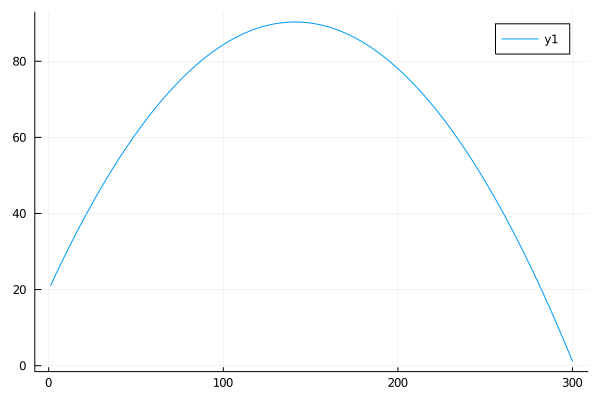

In [125]:
plot(xab)

Na aula 9 esse foi o nosso resultado, agora vamos tentar aplicar Gauss Jacobi nesse mesmo problema, dado que já temos as matrizes $A$ e $b$

In [84]:
using LinearAlgebra

Algoritmo de Gauss Jacobi baseado no que foi feito na aula 8, com alterações para torná-lo genérico

In [92]:
function gauss_jacobi(A, b, num_iteracoes = 1000)
    linhas, colunas = size(b)
    x = randn(linhas, 1)
    D, R = quebra(A)

    for i=1:num_iteracoes
        x = inv(D)*(b-R*x)
    end
    return x
end

gauss_jacobi (generic function with 2 methods)

In [93]:
function quebra(A)
    D = Diagonal(A)
    R = A - D
    return D, R
end

quebra (generic function with 1 method)

## Vamos primeiro resolver para $n = 3$ 

In [126]:
A,b = criacao_do_sistema(3, 20, 0, 8);

In [127]:
A

3×3 Array{Float64,2}:
 -2.0   1.0   0.0
  1.0  -2.0   1.0
  0.0   1.0  -2.0

In [128]:
b

3×1 Array{Float64,2}:
 -60.0
 -40.0
 -40.0

In [129]:
xab = A \ b

3×1 Array{Float64,2}:
 75.0
 90.0
 64.99999999999999

### Vamos rodar o Gauss Jacobi com 1000 iterações

In [132]:
x = gauss_jacobi(A, b, 1000)

3×1 Array{Float64,2}:
 75.0
 90.0
 65.0

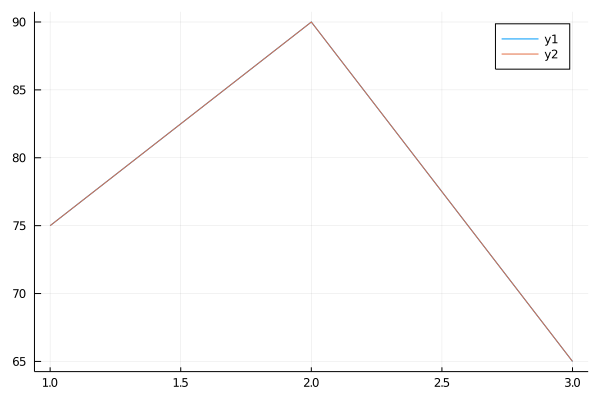

In [133]:
plot([x,xab])

Os valores são idênticos devida a pouca quantidade de dados e consequentemente passos, fazendo com que o gauss jacobi converta muito rápido

## Agora vamos resolver para $n = 300$ 

In [134]:
A,b = criacao_do_sistema(300, 20, 0, 8);

In [135]:
A

300×300 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  1.0  -2.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

In [136]:
b

300×1 Array{Float64,2}:
 -20.007063939691616
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
   ⋮
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883
  -0.007063939691614883

In [137]:
xab = A \ b

300×1 Array{Float64,2}:
 20.99314577101798
 21.97922760234434
 22.95824549397909
 23.930199445922227
 24.895089458173747
 25.85291553073365
 26.80367766360194
 27.74737585677861
 28.68401011026367
 29.61358042405712
 30.53608679815895
 31.45152923256916
 32.35990772728776
  ⋮
 13.046213617951642
 11.99788081809289
 10.94248407854252
  9.880023399300537
  8.810498780366938
  7.733910221741723
  6.650257723424892
  5.559541285416447
  4.461760907716387
  3.356916590324713
  2.2450083332414232
  1.126036136466519

### Vamos rodar o Gauss Jacobi com 1000 iterações

In [146]:
x = gauss_jacobi(A, b, 1000);

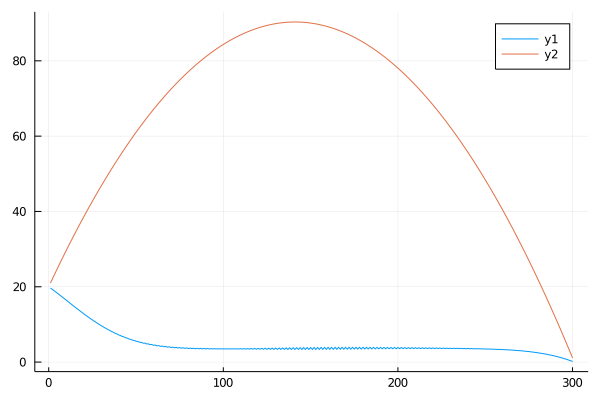

In [147]:
plot([x,xab])

Podemos perceber que foi uma péssima aproximação porque o método não teve iterações o suficiente para convergir, ou então ele é um caso de divergência do método. Vamos conferir usando mais iterações

### Gauss Jacobi com 10000 iterações

In [148]:
x = gauss_jacobi(A, b, 10000);

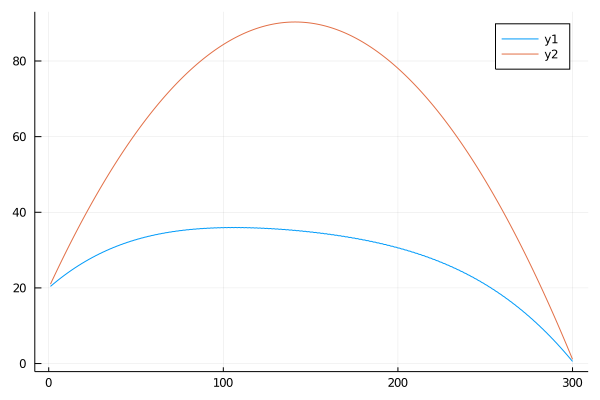

In [149]:
plot([x,xab])

Aparentemente está convergindo, vamos continuar com mais iterações

### Gauss Jacobi com 100000 iterações

In [150]:
x = gauss_jacobi(A, b, 100000);

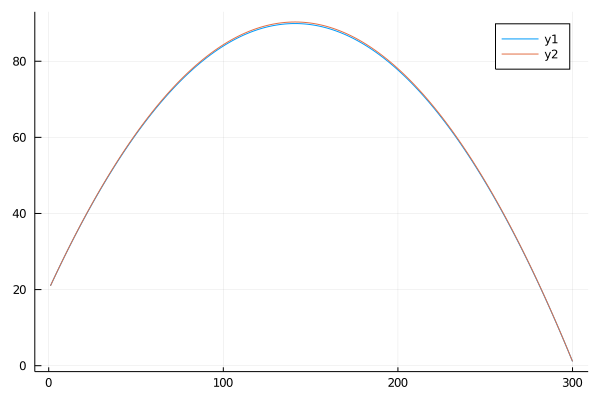

In [151]:
plot([x,xab])